# Face Detection

Submitted by: Ephi Frankel




In [1]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt

from glob import glob 

In [2]:
# init HOG descriptor

winSize = (36,36)  # examples size are 36x36 pixels
blockSize = (6,6)
blockStride = (3,3)
cellSize = (3,3)
nbins = 9
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins)

print(hog.getDescriptorSize())


# HOG descriptor size: 11x11x4x9 = 4356 values

4356


###  positive (faces) examples

Load each of the faces examples (36x36 pixels each). For each image extract its 4356-D HOG descriptor.

Collect all descriptors into a NumPy array of size: $N_{faces}\times 4356$

Prepare a labels vector of size $N_{faces}$ with '+1' labels.

Display a few of the faces examples.

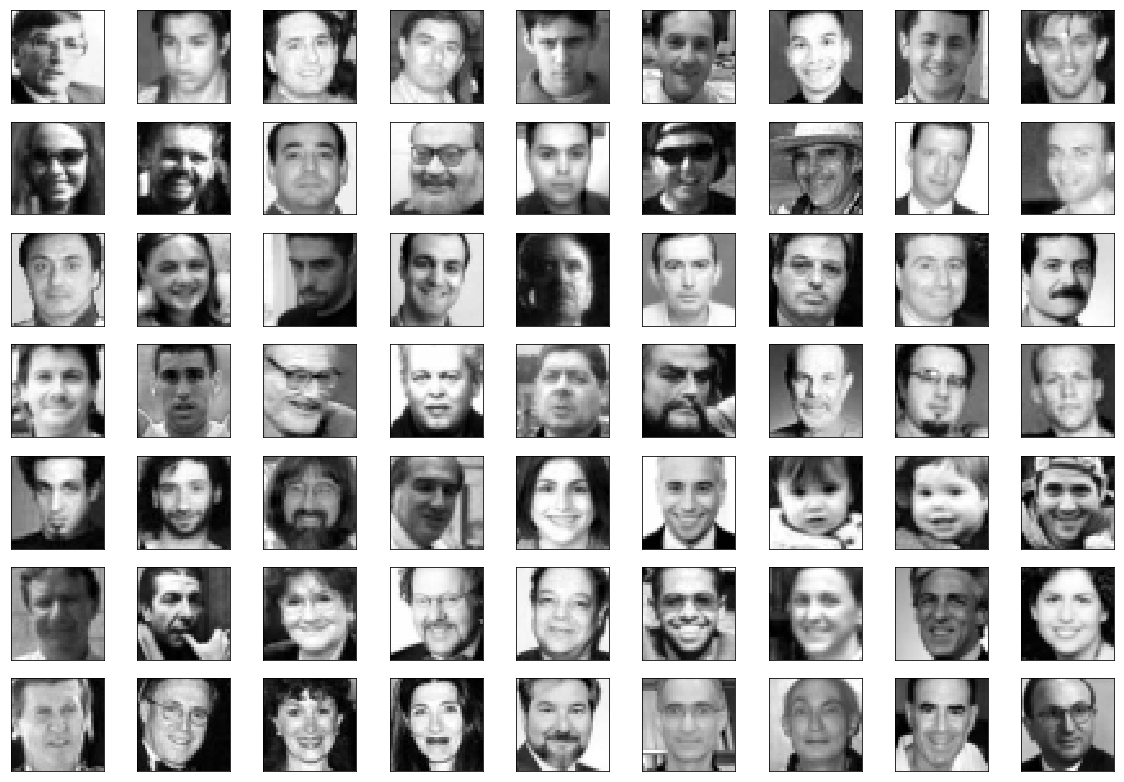

hog faces matrix shape: (6713, 4356)
face labels shape: (6713,)


In [3]:
# your code here...
fnames=glob('faces\*.jpg')

hog_faces = []
face_lbls = np.ones(len(fnames))
i = 0
plt.figure(figsize=(20,14))
for i,f in enumerate(fnames):
    name,ext = f.split('.')
    name = name.split('\\')[-1]
    im = cv2.imread(f,0)
    if(i < 63):
        plt.subplot(7,9,i+1)
        plt.imshow(im, cmap='gray')
        plt.xticks([]), plt.yticks([])
    img_hog_desc = hog.compute(im).flatten()
    hog_faces.append(img_hog_desc)
    i = i + 1
plt.show()
hog_faces = np.array(hog_faces)
print('hog faces matrix shape: {}'.format(hog_faces.shape))
print('face labels shape: {}'.format(face_lbls.shape))

###  negative (non-faces) examples

Construct the negative examples (non-faces) in the following way. From each of the non-faces images, extract N=30 random patches of 36x36 pixels. These patches will be used as the negative examples. Display a few of the negative examples.

For each patch extract its 4356-D HOG descriptor. Collect all descriptors into a NumPy array of size: $N_{nonfaces}\times 4356$

Prepare a labels vector of size $N_{nonfaces}$ with '-1' labels.



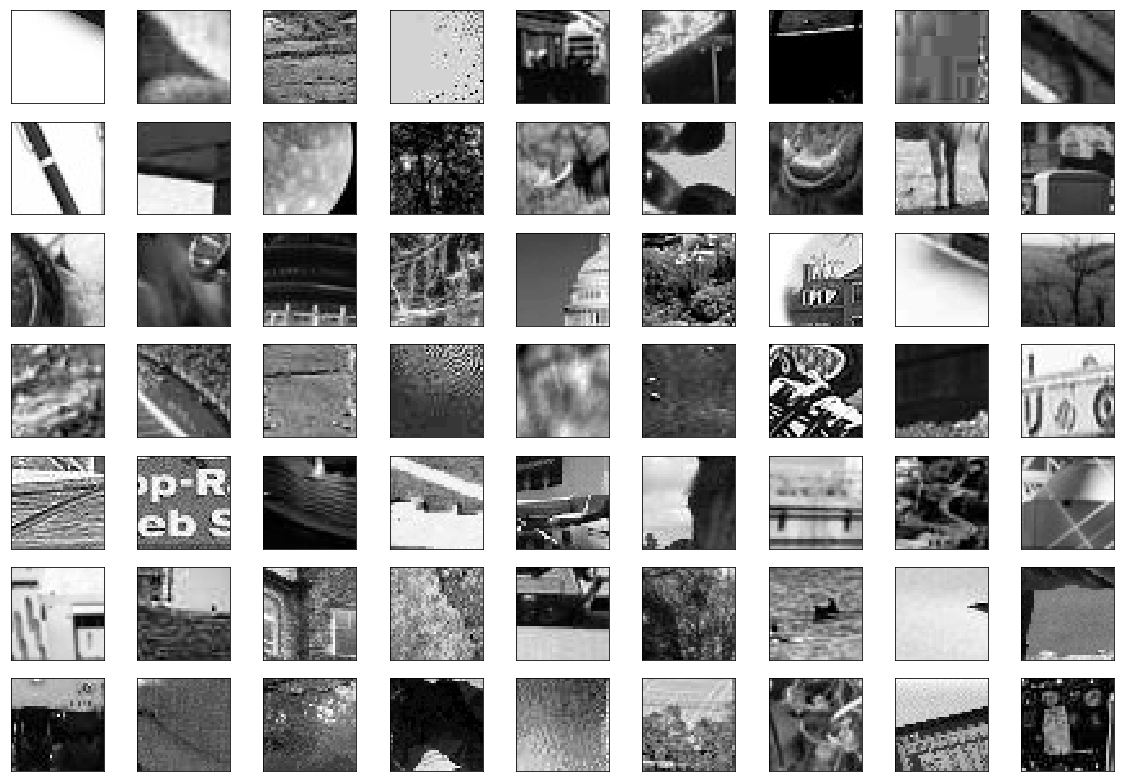

hog nonfaces matrix shape: (8220, 4356)
nonface labels shape: (8220,)


In [4]:
# your code here...
fnames=glob('nonfaces\*.jpg')
N = 30
hog_nonfaces = []

i = 0
plt.figure(figsize=(20,14))
total_nonface = 0
for i,f in enumerate(fnames):
    name,ext = f.split('.')
    name = name.split('\\')[-1]
  
    im = cv2.imread(f,0)
    allowShow = True
    for j in range(0,N):
        total_nonface = total_nonface + 1
        x = np.random.randint(0,im.shape[0]-36)
        y = np.random.randint(0,im.shape[1]-36)
        subim = im[x:x+36,y:y+36]
        if(i < 63 and allowShow):
            plt.subplot(7,9,i+1)
            plt.imshow(subim, cmap='gray')
            plt.xticks([]), plt.yticks([])
            allowShow = False
        img_hog_desc = hog.compute(subim).flatten()
        hog_nonfaces.append(img_hog_desc)
    i = i + 1
plt.show()
hog_nonfaces = np.array(hog_nonfaces)
nonface_lbls = (np.ones(total_nonface)*-1)
print('hog nonfaces matrix shape: {}'.format(hog_nonfaces.shape))
print('nonface labels shape: {}'.format(nonface_lbls.shape))

### Linear SVM classifier

Concatenate all examples into a $(N_{faces}+N{nonfaces})\times 4356$ float32 array.

Concatenate all labels into a $N_{faces}+N{nonfaces}$ vector.

Then, train the SVM classifier:

   `svm.train(data, cv2.ml.ROW_SAMPLE, labels)`



In [5]:
# SVM
svm = cv2.ml.SVM_create()

svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setTermCriteria((cv2.TERM_CRITERIA_COUNT, 100, 1e-6))

# your code here..
design_matrix = np.concatenate( (hog_faces,hog_nonfaces)).astype('float32')
labels = np.concatenate( (face_lbls,nonface_lbls)).astype('int32')
print('deign_matrix shape: {}'.format(design_matrix.shape))
print('labels shape: {}'.format(labels.shape))
#train SVM
svm.train(design_matrix, cv2.ml.ROW_SAMPLE, labels)

deign_matrix shape: (14933, 4356)
labels shape: (14933,)


True

In [6]:
# set HOG detector with SVM classifier

sv = svm.getSupportVectors()
rho,alpha,tmp = svm.getDecisionFunction(0)
sv = np.append(-alpha*sv,rho)

hog.setSVMDetector(sv)  

### Detection

Load a testing image.

Use `hog.detectMultiScale` to detect faces in the image. Use `cv2.rectangle()` to draw the detections on the image (use a copy of the image, as this drawing function changes the image itself).

Play with the detection parameters until you get good results. 

Choose another testing iage or two, and repeat the detection process.

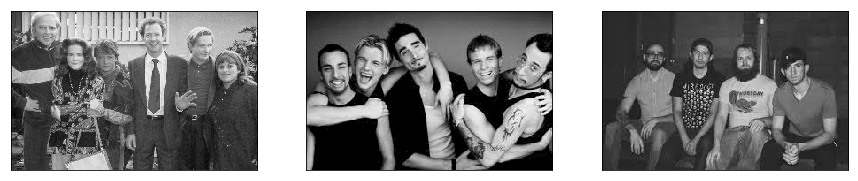

In [7]:
img = cv2.imread('test_image.jpg',0)
img2 = cv2.imread('test_image2.png',0)
img3 = cv2.imread('test_image3.jpg',0)
imgs = [img,img2,img3]
plt.figure(figsize=(15,25))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2)
plt.imshow(img2, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3)
plt.imshow(img3, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

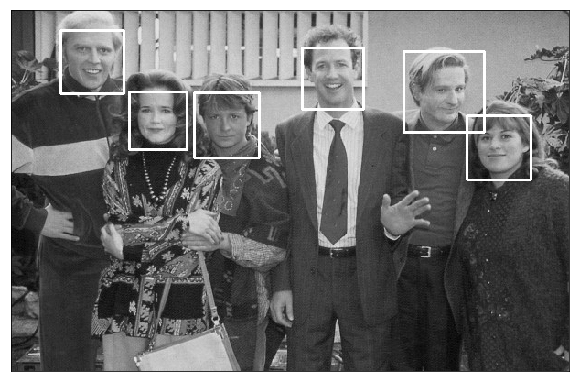

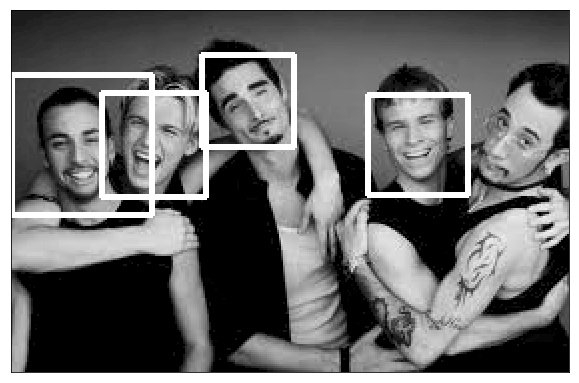

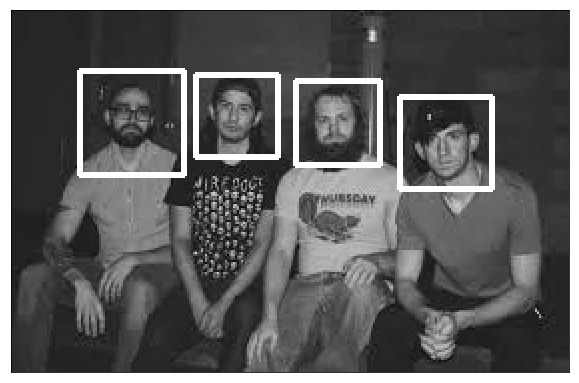

In [8]:
th_p_img = [80,60,62]
for j,img in enumerate(imgs):
    rects, weights = hog.detectMultiScale(img, winStride=(8,8), scale=1.05, hitThreshold=0, finalThreshold=2)
    img_copy = img.copy()
    # your code here..
    th = np.percentile(weights, th_p_img[j])
    for i,(x, y, w, h) in enumerate(rects):
        if(weights[i] > th):
            cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255, 0, 0), 2)
    plt.figure(figsize=(10,15))
    plt.imshow(img_copy, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()

## Good Luck!